In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [2]:
test ="Mid_Case" # "Mid_Case","Electrification","High_RE_Cost"
scen = [test,test+"_95_by_2050",test+"_95_by_2035"]
analysis = ["v6.2jedi_mid"]
i = 0
for a in analysis:
    for s in scen:
        fpath = r"analysis/1_ReEDS_to_JEDI/output/JEDI_output_StdScen21_"+s+"_annual_state_"+a+".csv"
        job_data = pd.read_csv(fpath)
        job_data["Scenario"] = s.replace("_"," ")
        job_data["analysis"] = a

        if i == 0:
            job_data_all = job_data.copy()
        else:
            job_data_all = job_data_all.append(job_data)
        i = i+1
job_data_all

,i,state,Agriculture,Mining,Construction,Manufacturing,Fabricated Metals,Machinery,Electrical Equipment,TCPU,Wholesale Trade,Retail Trade,FIRE,Misc. Services,Professional Services,Government,Scenario,analysis
0,2022,AL,0.920711,2832.718967,0.000000,73.381766,0.001155,239.827145,116.097648,7118.032700,485.867396,146.353536,1150.582392,297.079418,2949.963563,10.430098,Electrification,v6.2jedi_mid
1,2022,AR,1.465985,3.140658,0.000000,34.097688,0.000636,105.364594,50.388294,2260.390623,155.277429,77.490580,627.194972,186.118523,1087.292859,6.595753,Electrification,v6.2jedi_mid
2,2022,AZ,3.111383,0.024051,369.838405,55.507408,24.287996,193.507574,217.481311,4038.456638,332.644094,142.580780,1222.085237,296.690324,2291.696365,33.095083,Electrification,v6.2jedi_mid
3,2022,CA,66.271552,188.416879,175.227543,327.295166,101.638468,117.677569,1168.821494,15085.045529,771.688608,436.621816,2394.230521,797.401737,3062.023748,35.709223,Electrification,v6.2jedi_mid
4,2022,CO,4.945552,1176.844489,1724.149279,136.910488,2.778147,17.869270,98.396229,2862.211673,182.020184,325.383375,573.062353,367.740334,496.293039,20.964373,Electrification,v6.2jedi_mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2050,VT,2.098736,0.002220,275.662706,27.476454,0.000306,0.006997,29.831355,476.340869,108.800292,134.467553,117.139107,138.680065,31.702784,18.928308,Electrification 95 by 2035,v6.2jedi_mid
1388,2050,WA,1008.659419,0.012878,0.000000,269.737561,0.004491,52.409640,1205.488524,8477.557186,1198.107968,380.041105,3399.617625,539.179334,1611.232512,39.542178,Electrification 95 by 2035,v6.2jedi_mid
1389,2050,WI,11.658403,0.008809,3906.304324,64.013702,0.007046,119.675042,1054.924571,6527.249089,291.688110,413.847561,1432.233475,352.588944,1035.769262,101.028922,Electrification 95 by 2035,v6.2jedi_mid
1390,2050,WV,2.471936,2.302457,1376.885726,65.545471,0.003573,8.866611,632.551826,4820.217202,205.018639,395.875375,281.345247,288.977754,202.832315,28.548621,Electrification 95 by 2035,v6.2jedi_mid


In [3]:
sec = job_data_all.columns[2:-2]
job_data_all["sum"] = job_data_all[sec].sum(axis=1)/1000
job_data_all_show = job_data_all[["i","state","sum","Scenario"]]
job_data_all_show["norm_year"] = job_data_all_show["i"]-2022
job_data_all_show["sum_norm"] = job_data_all_show["sum"]/332403*100
job_data_all_show

<ipython-input-3-62f90876297a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data_all_show["norm_year"] = job_data_all_show["i"]-2022
<ipython-input-3-62f90876297a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data_all_show["sum_norm"] = job_data_all_show["sum"]/332403*100


,i,state,sum,Scenario,norm_year,sum_norm
0,2022,AL,15.421256,Electrification,0,0.004639
1,2022,AR,4.594819,Electrification,0,0.001382
2,2022,AZ,9.221007,Electrification,0,0.002774
3,2022,CA,24.728070,Electrification,0,0.007439
4,2022,CO,7.989569,Electrification,0,0.002404
...,...,...,...,...,...,...
1387,2050,VT,1.361138,Electrification 95 by 2035,28,0.000409
1388,2050,WA,18.181590,Electrification 95 by 2035,28,0.005470
1389,2050,WI,15.310997,Electrification 95 by 2035,28,0.004606
1390,2050,WV,8.311443,Electrification 95 by 2035,28,0.002500


- gold rush 
    - census: https://www.census.gov/history/www/homepage_archive/2018/january_2018.html#:~:text=U.S.%20Census%20Bureau%20History%3A%20The%20California%20Gold%20Rush&text=from%20approximately%208%2C000%20in%201840,24%2C%201848%2C%20James%20W.
    - encyclopaedia: https://www.britannica.com/topic/California-Gold-Rush By August 1848, 4,000 gold miners were in the area, and within a year about 80,000 “forty-niners” (as the fortune seekers of 1849 were called) had arrived at the California goldfields. By 1853 their numbers had grown to 250,000. 
- silicon valley tech boom
    - encyclopaedia: https://www.britannica.com/place/Silicon-Valley-region-California/Explosive-growth In 1959 there were roughly 18,000 high-technology jobs in the area. By 1971 there were approximately 117,000 such jobs, and in 1990 nearly 268,000 filled positions. 
- Bakken https://www.bls.gov/opub/ted/2013/ted_20130429.htm  From 2007 to 2011, among U.S. counties within this region, employment grew from 77,937 jobs to 105,891 jobs—an increase of 35.9 percent. 

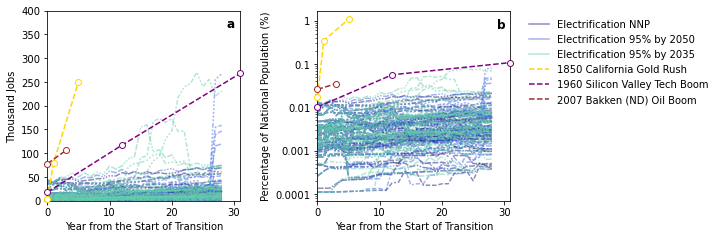

In [4]:
from matplotlib.pyplot import figure
plt.rc('figure', figsize=(8.3,3.5))
f, axes = plt.subplots(1,2)
f.subplots_adjust(wspace=0.4)

test_reform = test.replace("_"," ")
test2 = test_reform + " 95 by 2050"
test3 = test_reform + " 95 by 2035"

# left plot
sns.lineplot(data=job_data_all_show.query("Scenario==@test_reform"), x="norm_year", y="sum",style = "state",
             color = "midnightblue",legend=None,alpha=0.5,ax=axes[0])
sns.lineplot(data=job_data_all_show.query("Scenario==@test2"), x="norm_year", y="sum",style = "state",
             color = "royalblue",legend=None,alpha=0.5,ax=axes[0])
sns.lineplot(data=job_data_all_show.query("Scenario==@test3"), x="norm_year", y="sum",style = "state",
             color = "mediumaquamarine",legend=None,alpha=0.5,ax=axes[0])

axes[0].plot([0,1,5],[4,80,250],linestyle='dashed', marker='o',color="gold",
             label="1850 California Gold Rush",mfc="white",clip_on=False,zorder=100)
axes[0].plot([0,12,31],[18,117,268],linestyle='dashed', marker='o',color="purple",
             label="1960 Silicon Valley Tech Boom",mfc="white",clip_on=False,zorder=100)
axes[0].plot([0,3],[78,106],linestyle='dashed', marker='o',color="brown",
             label="2007 Bakken (ND) Oil Boom",mfc="white",clip_on=False,zorder=100)
axes[0].set_xlim([0,31])
axes[0].set_ylim([0,400])
axes[0].set_ylabel("Thousand Jobs")
axes[0].set_xlabel("Year from the Start of Transition")
axes[0].text(29.5, 400*0.93, 'a', horizontalalignment='center', verticalalignment='center',size=12,fontweight="bold")

# right plot
sns.lineplot(data=job_data_all_show.query("Scenario==@test_reform"), x="norm_year", y="sum_norm",style = "state",
             color = "midnightblue",legend=None,alpha=0.5,ax=axes[1])
sns.lineplot(data=job_data_all_show.query("Scenario==@test2"), x="norm_year", y="sum_norm",style = "state",
             color = "royalblue",legend=None,alpha=0.5,ax=axes[1])
sns.lineplot(data=job_data_all_show.query("Scenario==@test3"), x="norm_year", y="sum_norm",style = "state",
             color = "mediumaquamarine",legend=None,alpha=0.5,ax=axes[1])

plt.plot([0,1,5],[4/23192*100,80/23192*100,250/23192*100],linestyle='dashed', marker='o',
         color="gold",mfc="white",label="1850 California Gold Rush",clip_on=False,zorder=100)
plt.plot([0,12,31],[18/177136*100,117/207660*100,268/249600*100],linestyle='dashed', marker='o',
         color="purple",mfc="white",label="1960 Silicon Valley Tech Boom",clip_on=False,zorder=100)
plt.plot([0,3],[78/301200*100,106/301200*100],linestyle='dashed', marker='o',color="brown",
         label="2007 Bakken (ND) Oil Boom",mfc="white",clip_on=False,zorder=100)
axes[1].set_yscale('log')
axes[1].set_xlim([0,31])
axes[1].set_ylabel("Percentage of National Population (%)")
axes[1].set_xlabel("Year from the Start of Transition")
axes[1].text(29.5, 0.8, 'b', horizontalalignment='center', verticalalignment='center',size=12,fontweight="bold")
axes[1].yaxis.set_major_formatter(ScalarFormatter())
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

custom_lines = [Line2D([0], [0], color="midnightblue", lw=1.5,alpha=0.5),
                Line2D([0], [0], color="royalblue", lw=1.5,alpha=0.5),
                Line2D([0], [0], color="mediumaquamarine", lw=1.5,alpha=0.5),
               Line2D([0], [0], color="gold", lw=1.5,linestyle="--"),
               Line2D([0], [0], color="purple", lw=1.5,linestyle="--"),
               Line2D([0], [0], color="brown", lw=1.5,linestyle="--")]
plt.legend(custom_lines, [test_reform+" NNP", test_reform+" 95% by 2050", test_reform+" 95% by 2035",
                          "1850 California Gold Rush",
                         "1960 Silicon Valley Tech Boom","2007 Bakken (ND) Oil Boom"],frameon=False,
                      bbox_to_anchor=(1.05, 1))
f.savefig("historical_"+test+"_log2.png",bbox_inches='tight',dpi=600)